In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import pylab as p
import numpy as np
import pandas as pd

In [143]:
#loading first csv with global record relase data by country, year, genre and format

df = pd.read_csv('./Data/release_data.csv')



In [213]:

df.isna().sum()

release_id    0
country       0
year          0
genre         2
format        0
dtype: int64

In [146]:
print(df.columns)

Index(['release_id', 'country', 'year', 'genre', 'format'], dtype='object')


In [147]:
#dropping null vallues from "year/country" column
df.dropna(subset =["year"] , inplace = True)
df.dropna(subset =["country"] , inplace = True)

In [150]:
#checking value count in year column
df_year = df[(df["year"] < 1910 )]
df_year.head()

,release_id,country,year,genre,format
974778,1016982,Russia,1903.0,Classical,Shellac
978473,1020499,US,1897.0,Jazz,Shellac
1270400,1289378,France,1860.0,Children's,All Media
1290169,1307084,US,1904.0,Jazz,Cylinder
1290194,1307106,US,1899.0,Brass & Military,Cylinder


In [153]:
#checking unique values
df["format"].unique()

array(['Vinyl', 'CD', 'Cassette', 'Box Set', 'All Media', 'File',
       'Floppy Disk', 'Flexi-disc', 'DAT', 'Minidisc', 'DVD', 'Lathe Cut',
       'CDV', 'Hybrid', 'VHS', 'Acetate', 'SACD', 'DVDr', 'Shellac',
       '8-Track Cartridge', 'MVD', 'Laserdisc', 'Reel-To-Reel',
       'Memory Stick', 'Betamax', 'DCC', 'UMD', 'Microcassette', 'HD DVD',
       'Blu-ray', 'Cylinder', 'DualDisc', 'Edison Disc',
       '4-Track Cartridge', 'Pathé Disc', 'VHD', 'Blu-ray-R', 'U-matic',
       'Film Reel', 'SelectaVision', 'MiniDV', 'Video8', 'Betacam SP',
       'PlayTape', 'Video 2000', 'Elcaset', 'Wire Recording',
       'NT Cassette', 'Betacam', 'Tefifon', 'RCA Tape Cartridge',
       'Pocket Rocker', 'DC-International', 'Cartrivision', 'HD DVD-R'],
      dtype=object)

In [154]:
#dropping the rows that have values non related to music format

types= ['All Media', 'File',
       'Floppy Disk', 'DVD', 'Hybrid', 'VHS', 'DVDr',
       '8-Track Cartridge', 'Reel-To-Reel',
       'Memory Stick', 'Betamax', 'HD DVD','Cylinder',
       '4-Track Cartridge', 'VHD', 'Blu-ray-R', 'U-matic',
       'Film Reel', 'SelectaVision', 'MiniDV', 'Video8', 'Betacam SP',
       'PlayTape', 'Video 2000', 'Wire Recording','Betacam', 'Tefifon',
       'Pocket Rocker', 'Cartrivision', 'HD DVD-R','RCA Tape Cartridge','UMD','Box Set','CDV','Flexi-disc']

new_df = df[df["format"].str.contains('|'.join(types)) == False]

In [156]:
new_df["format"].unique()

array(['Vinyl', 'CD', 'Cassette', 'DAT', 'Minidisc', 'Lathe Cut',
       'Acetate', 'SACD', 'Shellac', 'MVD', 'Laserdisc', 'DCC',
       'Microcassette', 'Blu-ray', 'DualDisc', 'Edison Disc',
       'Pathé Disc', 'Elcaset', 'NT Cassette', 'DC-International'],
      dtype=object)

In [158]:
#grouping similar formats into one common format 

In [159]:
new_df = new_df.replace(to_replace=['Lathe Cut', 'Acetate','Edison Disc','Pathé Disc','Shellac'],
           value="Vinyl")

In [160]:
new_df = new_df.replace(to_replace=['Minidisc', 'MVD','Laserdisc','DCC','SACD', 'Blu-ray','DualDisc'],
           value="CD")

In [161]:
new_df = new_df.replace(to_replace=['DC-International', 'NT Cassette','Elcaset','Microcassette','DAT', 'Blu-ray','DualDisc'],
           value='Cassette')

In [165]:
#checking the min value in year, and dropping all the values in years before 1950
new_df['year'].min()
new_df = new_df[(new_df["year"] > 1950 )]


1889.0

In [167]:
#dropping year 2020, because of missing data
new_df = new_df[(new_df["year"] < 2020 )]


In [214]:
global_release = new_df

In [170]:
#checking data types
global_release.dtypes

release_id      int64
country        object
year          float64
genre          object
format         object
dtype: object

In [174]:
#converting year value into int
global_release['year'] = global_release['year'].astype(int)


In [46]:
my_df = global_release

In [209]:
#grouping by country, year and format. format as count
#to have aggregated data
df_year_country_genre =  my_df.groupby(["year","country","format","genre"])["format"].count().reset_index(name="records_count")

In [215]:
df_year_country_genre.sample()

,year,country,format,genre,records_count
114174,2015,Iceland,Vinyl,Hip Hop,1


In [212]:
#exporting to CSV
df_year_country_genre.to_csv("./Data/format_release.csv", index = False)

# LP unit sold US 1993-2021

Data on vinyl album sales in the United States from 1993 to 2020 shows consistent growth since 2006, and in 2021 a total of 41.7 million vinyl albums were sold, up by over 50 percent percent from the previous year.


 LP/vinyl sales - additional information 

Vinyl records, or LPs (short for Long Play), dominated the music recording industry for most of the twentieth century, holding their own against cassette tapes between the 1970s and 1990s, but sales of the compact disc (or CD), introduced in 1983, outpaced LP sales by the end of the 1980s. LPs have been enjoying a comeback in recent years, and the vinyl record is the only format of music available that has recorded positive sales growth from 2009 to 2017. This is impressive, especially because the overall number of albums sold in all formats has been decreasing since at least 2007.

 
    ###  Add graph for album decrease

In [223]:
lp_sales_unit_df = pd.read_csv('./Data/unit_sales_us.csv')


In [224]:
lp_sales_unit_df.head()


,year,unit sale in million
0,1993,0.3
1,1994,0.6
2,1995,0.8
3,1996,1.1
4,1997,1.1


In [225]:
lp_sales_unit_df["unit sale in million"] = lp_sales_unit_df["unit sale in million"].astype(float)


In [227]:
lp_sales_unit_df.sample()

,year,unit sale in million
7,2000,1.5


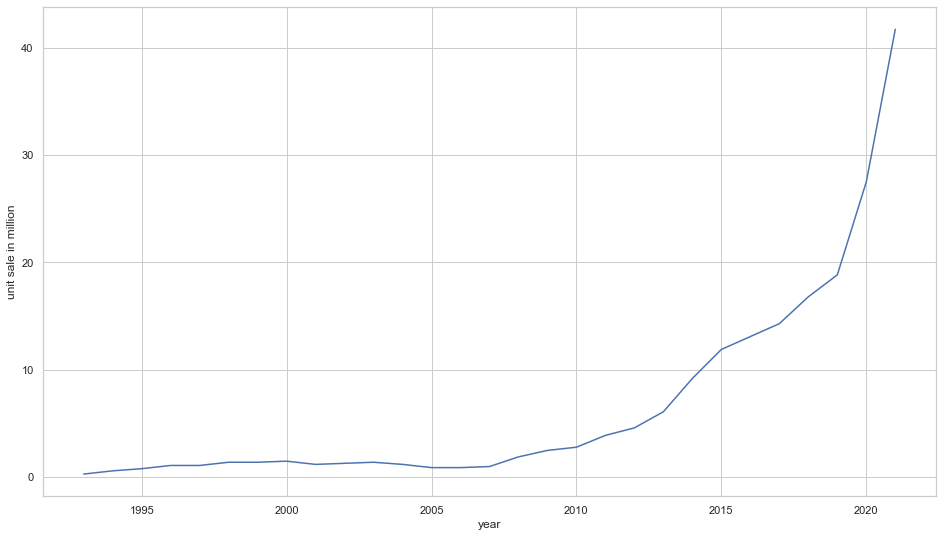

In [228]:
sns.lineplot( x = "year",y = "unit sale in million", data = lp_sales_unit_df);

In [229]:
lp_df.to_csv("./Data/unit_sales_us_new.csv", index = False)

# LP Sales worldwide 1997-2015

The timeline shows data on vinyl record sales worldwide from 1997 to 2015. In 2005, vinyl records generated 35 million U.S. dollars in sales, a figure which increased more than tenfold to 416 million U.S. dollars in 2015. Data for vinyl album sales in the United States can be found here . Vinyls have experienced a resurgence in recent years and a total of over 13 million units were sold in the United States in 2016, up from just 2.8 million in 2010. 


In line with the global trend, over 13 million vinyl albums were sold in the U.S. in 2016, a significant increase from one million units sold in 2007. Amazon is the most popular place to purchase a vinyl record in the U.S. , accounting for nearly 40 percent of the market share. Best Buy is the second most popular retailer for vinyl records. Independent record stores, eBay and swap meet or flea markets are also common places American purchase LP records. 



 

In [179]:
sale_df = pd.read_csv('./Data/record_sales_worldwide.csv')
 

In [180]:
sale_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,year,Global sales
4,NaN,1997,"137,000,000"
5,NaN,1998,"125,000,000"
6,NaN,1999,"133,000,000"
7,NaN,2000,"93,000,000"
8,NaN,2001,"81,000,000"
9,NaN,2002,"58,000,000"
